In [17]:
from pyts.approximation import SymbolicAggregateApproximation
import matplotlib.pyplot as plt 
from scipy.stats import norm
import numpy as np 
import matplotlib.lines as mlines

In [22]:
n_samples, n_timestamps = 100, 96

In [23]:
rng = np.random.RandomState(42)
X = rng.randn(n_samples, n_timestamps)

Text(0, 0.5, 'x')

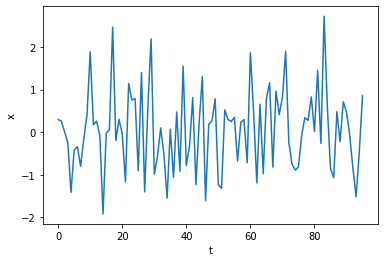

In [24]:
plt.plot(X[1, :])
plt.xlabel('t')
plt.ylabel('x')

In [40]:
# Sax transform
n_bins = 5
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')

In [41]:
X_sax = sax.fit_transform(X)

In [42]:
X_sax[1,:]

array(['d', 'd', 'c', 'c', 'a', 'b', 'b', 'b', 'c', 'd', 'e', 'c', 'd',
       'c', 'a', 'c', 'c', 'e', 'c', 'd', 'c', 'a', 'e', 'd', 'd', 'a',
       'e', 'a', 'd', 'e', 'a', 'b', 'c', 'b', 'a', 'c', 'a', 'd', 'a',
       'e', 'b', 'b', 'd', 'a', 'c', 'e', 'a', 'c', 'd', 'd', 'a', 'a',
       'd', 'd', 'c', 'd', 'b', 'c', 'd', 'b', 'e', 'd', 'a', 'd', 'a',
       'd', 'e', 'b', 'e', 'd', 'd', 'e', 'c', 'b', 'a', 'b', 'c', 'd',
       'd', 'd', 'c', 'e', 'b', 'e', 'd', 'a', 'a', 'd', 'c', 'd', 'd',
       'c', 'a', 'a', 'b', 'e'], dtype='<U1')

In [43]:
bins = norm.ppf(np.linspace(0, 1, n_bins+1)[1:-1])
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

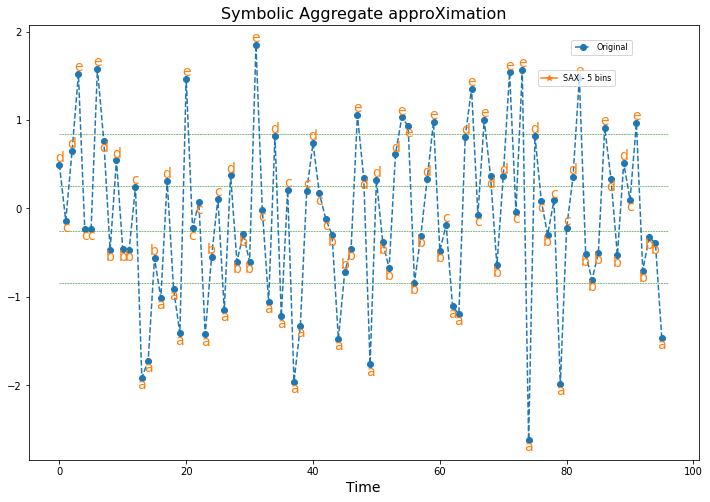

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()